# Propagation of Uncertainty

In this notebook we take a look at the effect of a system on the input distribution.
First, the necessary imports.

In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from src.utils.plotting import init_plot_style

init_plot_style()

We start with a simple Gaussian and apply an affine transform.

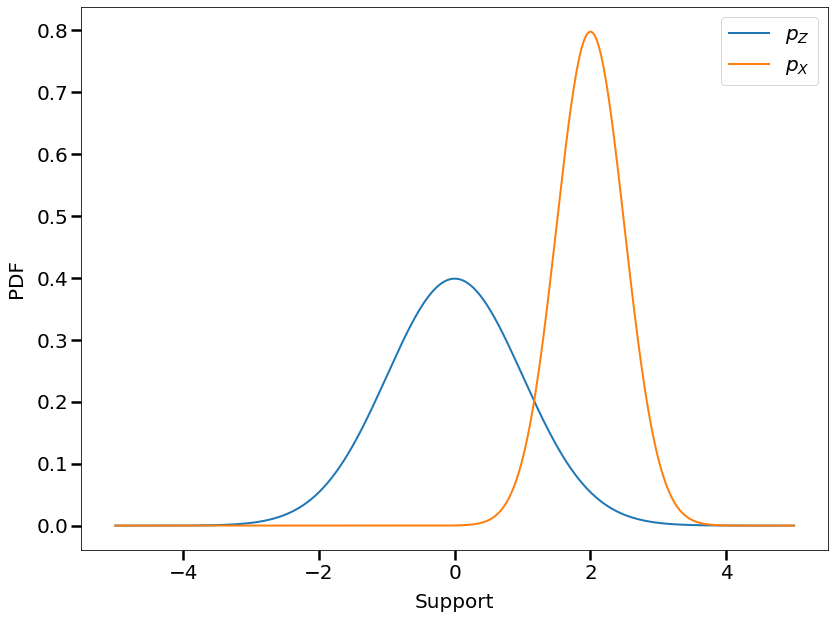

In [2]:
# define analytic pdf + system functions
support = np.linspace(-5, 5, 500)
pz = lambda z: np.exp(-z**2/2) / np.sqrt(2*np.pi)
f = lambda z: 0.5*z + 2
f_inv = lambda x: (x - 2) / 0.5
det_f_inv = 1 / 0.5

# plot the analytic pdfs
plt.close('all')
plt.figure()
plt.plot(support, pz(support), label=r'$p_Z$')
plt.plot(support, det_f_inv * pz(f_inv(support)), label=r'$p_X$')
plt.xlabel('Support')
plt.ylabel('PDF')
plt.legend()
plt.tight_layout()

Here a small numerical test on generated samples.

In [3]:
# draw samples from pz
rng = np.random.default_rng()
n_samples = 5000
z_samples = rng.normal(0,1, n_samples)

print(f'Estimated mean of Z is {np.mean(z_samples)}')
print(f'Estimated std deviation of Z is {np.std(z_samples, ddof=1)}')

# propagate the samples over the system and compute statistics
x_samples = f(z_samples)

print(f'Estimated mean of X is {np.mean(x_samples)}')
print(f'Estimated std deviation of X is {np.std(x_samples, ddof=1)}')


Estimated mean of Z is 0.0034601873024373104
Estimated std deviation of Z is 0.9866571183921858
Estimated mean of X is 2.0017300936512186
Estimated std deviation of X is 0.4933285591960929


Now we propagate our Gaussian input data over a tanh function!

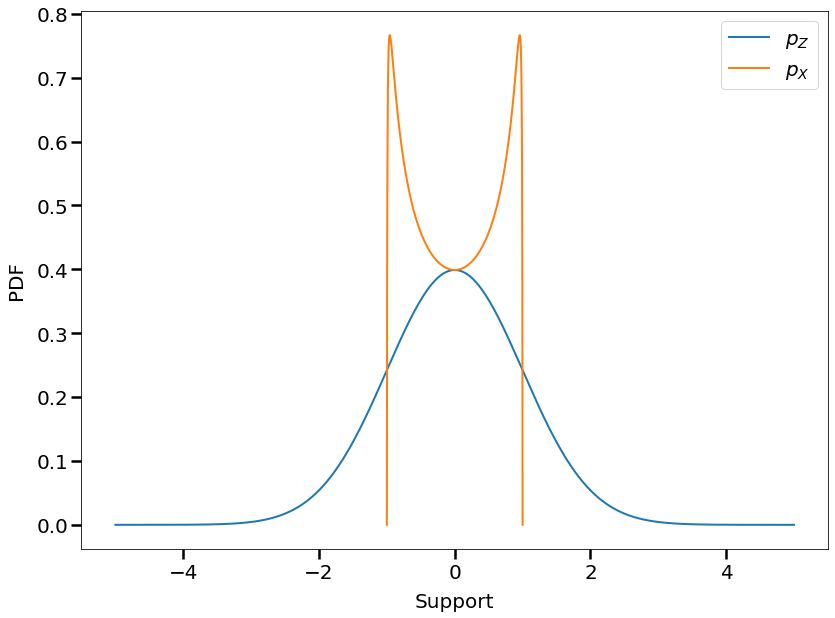

In [4]:
# define analytic pdf + system functions
support = np.linspace(-5, 5, 500)
support_x = np.linspace(-1+1e-8, 1-1e-8, 500)
pz = lambda z: np.exp(-z**2/2) / np.sqrt(2*np.pi)
f = lambda z: np.tanh(z)
f_inv = lambda x: np.arctanh(x)
det_f_inv = lambda x: 1 / (1 - x**2)

# plot the analytic pdfs
plt.close('all')
plt.figure()
plt.plot(support, pz(support), label=r'$p_Z$')
plt.plot(support_x, det_f_inv(support_x) * pz(f_inv(support_x)), label=r'$p_X$')
plt.xlabel('Support')
plt.ylabel('PDF')
plt.legend()
plt.tight_layout()

Here we generate some samples and look at the histogram of the transformed samples.

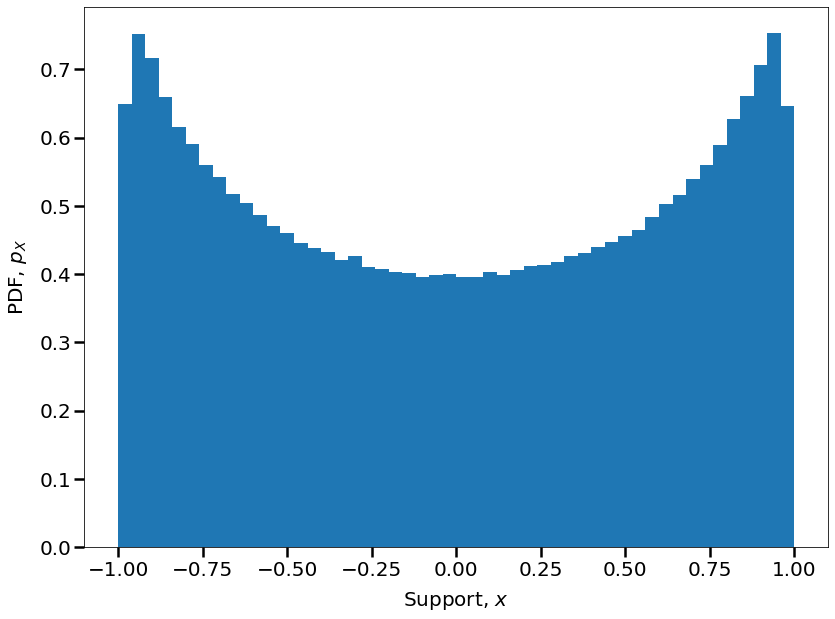

In [5]:
# draw samples from pz
rng = np.random.default_rng()
n_samples = int(1e6)
z_samples = rng.normal(0,1, n_samples)
x_samples = f(z_samples)

# plot the histogram
plt.close('all')
plt.figure()
plt.hist(x_samples, bins=50, density=True)
plt.xlabel(r'Support, $x$')
plt.ylabel(r'PDF, $p_X$')
plt.tight_layout()
